Final parameters: theta_0 = 7.1077, theta_1 = 2.8649


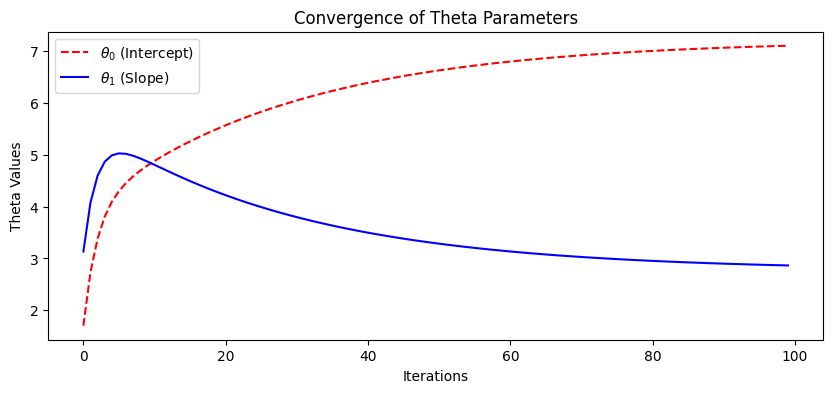

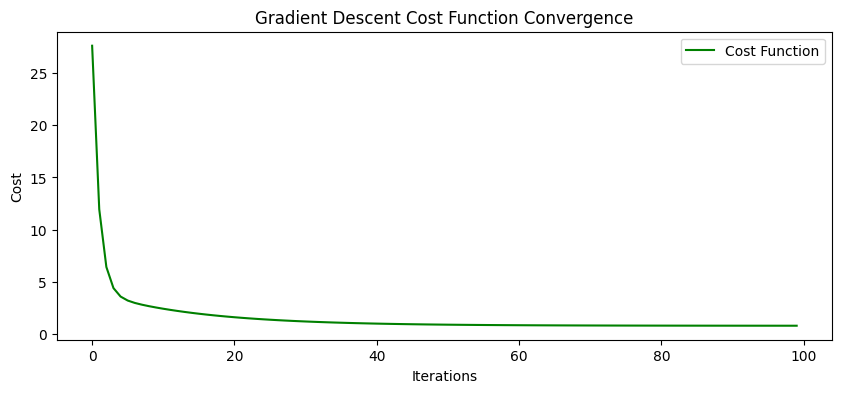

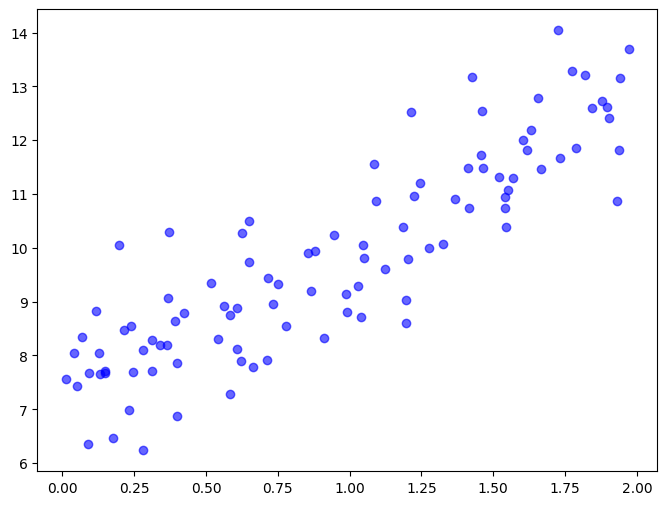

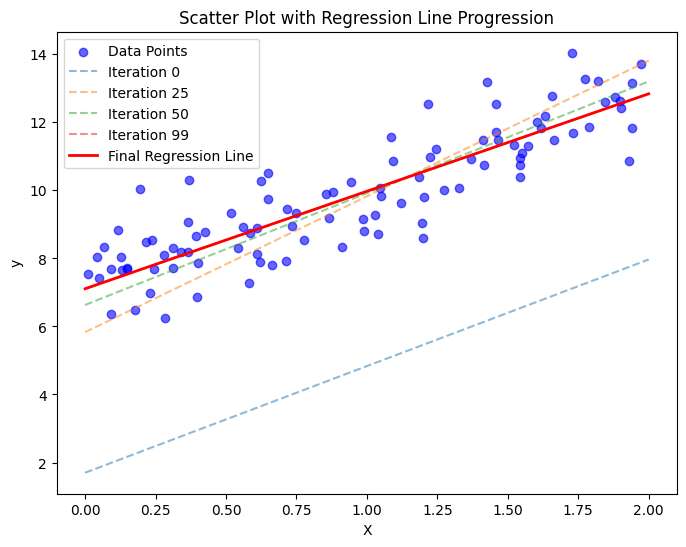

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data (y = 3x + 7 + noise)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 7 + np.random.randn(100, 1)  # Adding some noise

# Initialize parameters (weights and bias)
theta = np.random.randn(2, 1)  # Random initialization
learning_rate = 0.1
iterations = 100

# Add bias term (X_0 = 1)
X_b = np.c_[np.ones((100, 1)), X]  # Shape (100,2) for bias and X

# Gradient Descent Function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    theta_history = []  # Store theta values for plotting

    for i in range(iterations):
        gradients = (2/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost = (1/m) * np.sum((X.dot(theta) - y) ** 2)
        cost_history.append(cost)
        theta_history.append(theta.copy())  # Store current theta values

    return theta, cost_history, theta_history

# Run Gradient Descent
theta_best, cost_history, theta_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# Print final parameters
print(f"Final parameters: theta_0 = {theta_best[0][0]:.4f}, theta_1 = {theta_best[1][0]:.4f}")

# Convert theta_history to numpy array for easier plotting
theta_history = np.array(theta_history)

# Plot Theta Convergence
plt.figure(figsize=(10, 4))
plt.plot(range(iterations), theta_history[:, 0], label=r"$\theta_0$ (Intercept)", linestyle="--", color="red")
plt.plot(range(iterations), theta_history[:, 1], label=r"$\theta_1$ (Slope)", linestyle="-", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Theta Values")
plt.title("Convergence of Theta Parameters")
plt.legend()
plt.show()

# Plot Cost Function Convergence
plt.figure(figsize=(10, 4))
plt.plot(range(iterations), cost_history, label="Cost Function", color="green")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Cost Function Convergence")
plt.legend()
plt.show()

# Scatter Plot of X, y with Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label="Data Points", alpha=0.6)
plt.show()

# Scatter Plot of X, y with Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label="Data Points", alpha=0.6)
X_line = np.linspace(0, 2, 100).reshape(-1, 1)  # Generate X values for line
X_line_b = np.c_[np.ones((100, 1)), X_line]  # Add bias term

# Plot Regression Line at Different Stages
for i in [0, iterations // 4, iterations // 2, iterations - 1]:
    theta_i = theta_history[i]
    y_pred = X_line_b.dot(theta_i)
    plt.plot(X_line, y_pred, linestyle="--", alpha=0.5, label=f"Iteration {i}")

# Final Regression Line
y_final = X_line_b.dot(theta_best)
plt.plot(X_line, y_final, color='red', label="Final Regression Line", linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot with Regression Line Progression")
plt.legend()
plt.show()


In [2]:
ani